In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
#import data_loading_plotting_fct as dlp

In [2]:
def load_fitnesses(folder):
    fit_file = open(folder + "/fitnesses")
    idx_file = open(folder + "/parent_indexes")
    
    fit_lines = fit_file.readlines()
    idx_lines = idx_file.readlines()

    fit_file.close()
    idx_file.close()

    data_line = []
    iter = 0
    prev_idx = []
    for fit_l,idx_l in zip(fit_lines,idx_lines):
        for fit, idx in zip(fit_l.split(","),idx_l.split(",")):
            data_line.append([iter,int(idx),float(fit)])
        iter+=len(list(set(idx_l.split(',')) ^ set(prev_idx)))
        prev_idx = idx_l.split(",")
    return data_line

def cap_to(N,n):
    return round(n/N)

def load_fitnesses_agg(folder):
    fit_file = open(folder + "/fitnesses")
    idx_file = open(folder + "/parent_indexes")
    time_file = open(folder + "/time_data")
    
    fit_lines = fit_file.readlines()
    idx_lines = idx_file.readlines()
    time_lines = time_file.readlines()
    init_time = float(time_lines[0])
    time_data = [float(time_lines[i+1]) - float(time_lines[i]) for i in range(len(time_lines[:-1]))]
    cum_time_data = [float(t) - init_time for t in time_lines]
    disc_time_data = [10000*round(t/10000) for t in cum_time_data]

    fit_file.close()
    idx_file.close()

    data_line = []
    iter = 0
    prev_iter = 0
    prev_idx = []
    new_ind = 0
    for fit_l,idx_l, t,ct,dt in zip(fit_lines,idx_lines, time_data,cum_time_data,disc_time_data):
        fitnesses = [float(fit) for fit in fit_l.split(",")]
        if(prev_iter == cap_to(200,iter)):
            new_ind += len(list(set(idx_l.split(',')) - set(prev_idx)))
        else:
            new_ind = len(list(set(idx_l.split(',')) - set(prev_idx)))
        data_line.append([t,ct,dt,200*cap_to(200,iter),iter,new_ind,np.mean(fitnesses),np.median(fitnesses),np.std(fitnesses),np.max(fitnesses),np.min(fitnesses)])
        prev_iter = cap_to(200,iter)
        iter+=len(list(set(idx_l.split(',')) - set(prev_idx)))
        prev_idx = idx_l.split(",")
    return data_line

def load_learning_data_agg(folder):
    lt_file = open(folder + "/learning_trials")
    ld_file = open(folder + "/learning_delta")
    idx_file = open(folder + "/parent_indexes")
    time_file = open(folder + "/time_data")

    lt_lines = lt_file.readlines()
    ld_lines = ld_file.readlines()
    idx_lines = idx_file.readlines()
    time_lines = time_file.readlines()
    init_time = float(time_lines[0])
    time_data = [float(time_lines[i+1]) - float(time_lines[i]) for i in range(len(time_lines[:-1]))]
    cum_time_data = [float(t) - init_time for t in time_lines]
    disc_time_data = [10000*round(t/10000) for t in cum_time_data]

    lt_file.close()
    ld_file.close()
    idx_file.close()

    data_line = []
    iter = 0
    prev_idx = []
    for lt_l, ld_l,idx_l, t, ct, dc in zip(lt_lines,ld_lines,idx_lines,time_data,cum_time_data, disc_time_data):
        deltas = [float(ld) for ld in ld_l.split(",")]
        trials = [int(lt) for lt in lt_l.split(",")]
        data_line.append([t,ct,dc,200*cap_to(200,iter),iter, \
                        np.mean(deltas),np.median(deltas),np.var(deltas),np.max(deltas),np.min(deltas), \
                        np.mean(trials),np.median(trials),np.var(trials),np.max(trials),np.min(trials),])
        iter+=len(list(set(idx_l.split(',')) - set(prev_idx)))
        prev_idx = idx_l.split(",")
    return data_line

def load_morph_norms_agg(folder):
    mn_file = open(folder + "/morph_norms")
    idx_file = open(folder + "/parent_indexes")
    time_file = open(folder + "/time_data")
    
    mn_lines = mn_file.readlines()
    idx_lines = idx_file.readlines()
    time_lines = time_file.readlines()
    init_time = float(time_lines[0])
    time_data = [float(time_lines[i+1]) - float(time_lines[i]) for i in range(len(time_lines[:-1]))]
    cum_time_data = [float(t) - init_time for t in time_lines]
    disc_time_data = [10000*round(t/10000) for t in cum_time_data]

    mn_file.close()
    idx_file.close()

    data_line = []
    iter = 0
    prev_iter = 0
    prev_idx = []
    new_ind = 0
    for mn_l,idx_l, t,ct,dt in zip(mn_lines,idx_lines, time_data,cum_time_data,disc_time_data):
        norms = [float(mn) for mn in mn_l.split(",")]
        if(prev_iter == cap_to(200,iter)):
            new_ind += len(list(set(idx_l.split(',')) - set(prev_idx)))
        else:
            new_ind = len(list(set(idx_l.split(',')) - set(prev_idx)))
        data_line.append([t,ct,dt,200*cap_to(200,iter),new_ind,np.mean(norms),np.median(norms),np.var(norms),np.max(norms),np.min(norms)])
        prev_iter = cap_to(200,iter)
        iter+=len(list(set(idx_l.split(',')) - set(prev_idx)))
        prev_idx = idx_l.split(",")
    return data_line

def load_controller_logs(folder):
    for dir in os.listdir(folder):
        if dir.split("_")[0] != "controller":
            continue
        for file in os.listdir(folder + "/" + dir):
            if file.split("_")[1] != "log":
                continue
            log_file = open(file)
            log_lines = log_file.readlines()
            if len(log_lines) == 0:
                pass
            else:
                fitnesses = [float(f) for f in log_lines.split(',')[-1]]
                np.var(fit[len(fit)/2:])
                


# Learning

In [4]:
data_lines = []
for variant in os.listdir("/home/leni/m2w_logs/learning_2/"):
    foldername = "/home/leni/m2w_logs/learning_2/" + variant
    for replicate in os.listdir(foldername):
        fit_lines = load_fitnesses_agg(foldername + "/" + replicate)
        data_lines += [[variant,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["variant","replicate","iteration","mean fit","median fit","variance fit","max fit","min fit"])

In [13]:
print(fit_data)

      synchronicity  target delta                               replicate  \
0       synchronous  target delta    m2w_2023_10_2_14_29_54_114183_788377   
1       synchronous  target delta    m2w_2023_10_2_14_29_54_114183_788377   
2       synchronous  target delta    m2w_2023_10_2_14_29_54_114183_788377   
3       synchronous  target delta    m2w_2023_10_2_14_29_54_114183_788377   
4       synchronous  target delta    m2w_2023_10_2_14_29_54_114183_788377   
...             ...           ...                                     ...   
51721  asynchronous     no target  m2w_2023_10_2_14_29_35_423379_15715915   
51722  asynchronous     no target  m2w_2023_10_2_14_29_35_423379_15715915   
51723  asynchronous     no target  m2w_2023_10_2_14_29_35_423379_15715915   
51724  asynchronous     no target  m2w_2023_10_2_14_29_35_423379_15715915   
51725  asynchronous     no target  m2w_2023_10_2_14_29_35_423379_15715915   

              time  cummulative time  discretized time  Number of robots  \

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

(0.0, 4000.0)

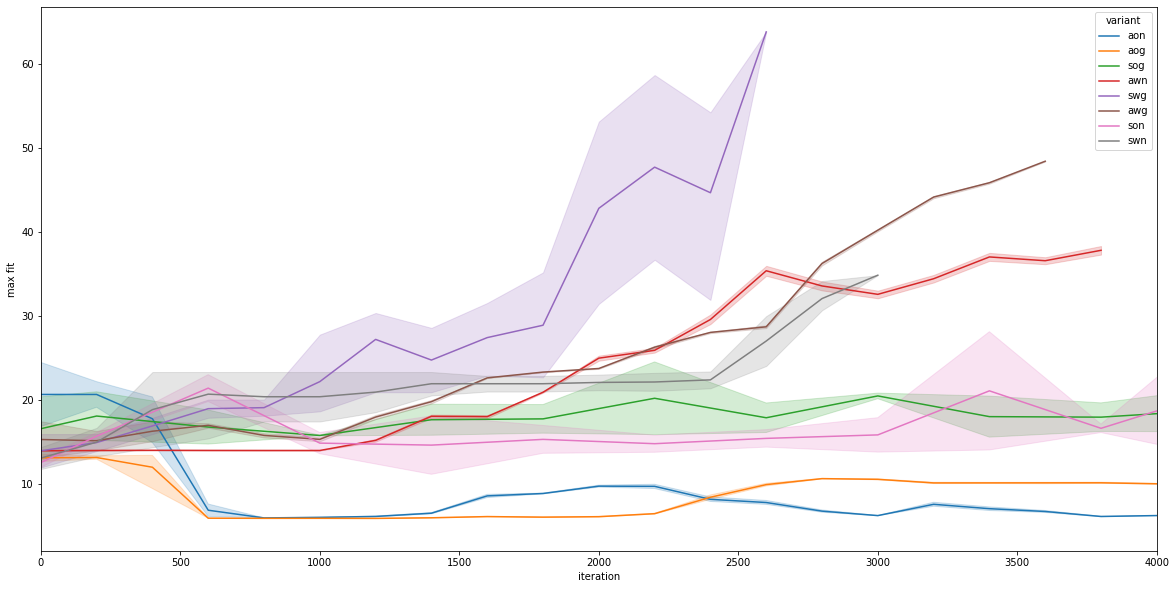

In [10]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data,x="iteration",y="max fit",hue="variant")
ax.set_xlim([0,4000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

(0.0, 4000.0)

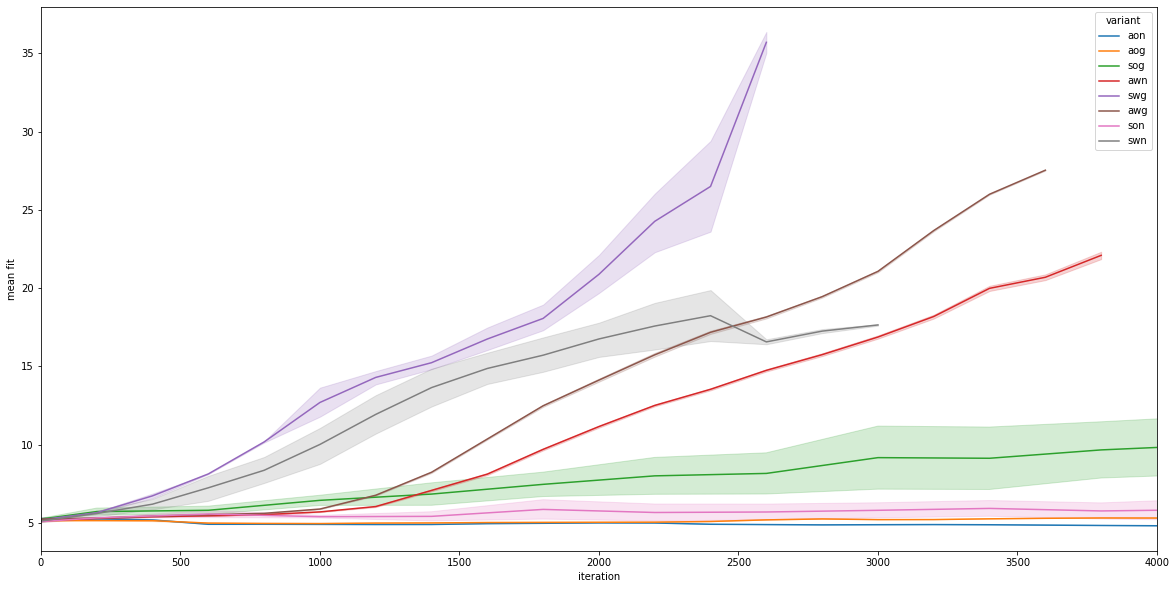

In [11]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data,x="iteration",y="mean fit",hue="variant")
ax.set_xlim([0,4000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='variant', ylabel='max fit'>

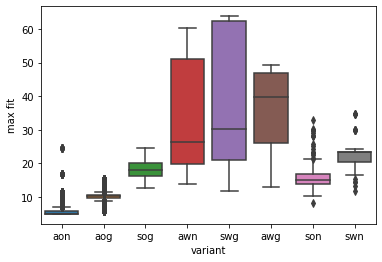

In [12]:
sns.boxplot(data=fit_data,x="variant",y="max fit")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='variant', ylabel='mean fit'>

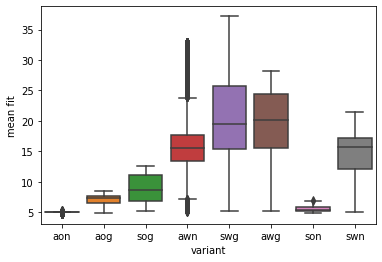

In [13]:
sns.boxplot(data=fit_data,x="variant",y="mean fit")

In [18]:
data_lines = []
for variant in os.listdir("/home/leni/m2w_logs/learning_2/"):
    foldername = "/home/leni/m2w_logs/learning_2/" + variant
    for replicate in os.listdir(foldername):
        fit_lines = load_learning_data_agg(foldername + "/" + replicate)
        data_lines += [[variant,replicate]+fit for fit in fit_lines]
ld_data = pd.DataFrame(data=data_lines,columns=["variant","replicate","iteration", \
                "mean delta","median delta","variance delta","max delta","min delta", \
                "mean trials","median trials","variance trials","max trials","min trials",])

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

(0.0, 4000.0)

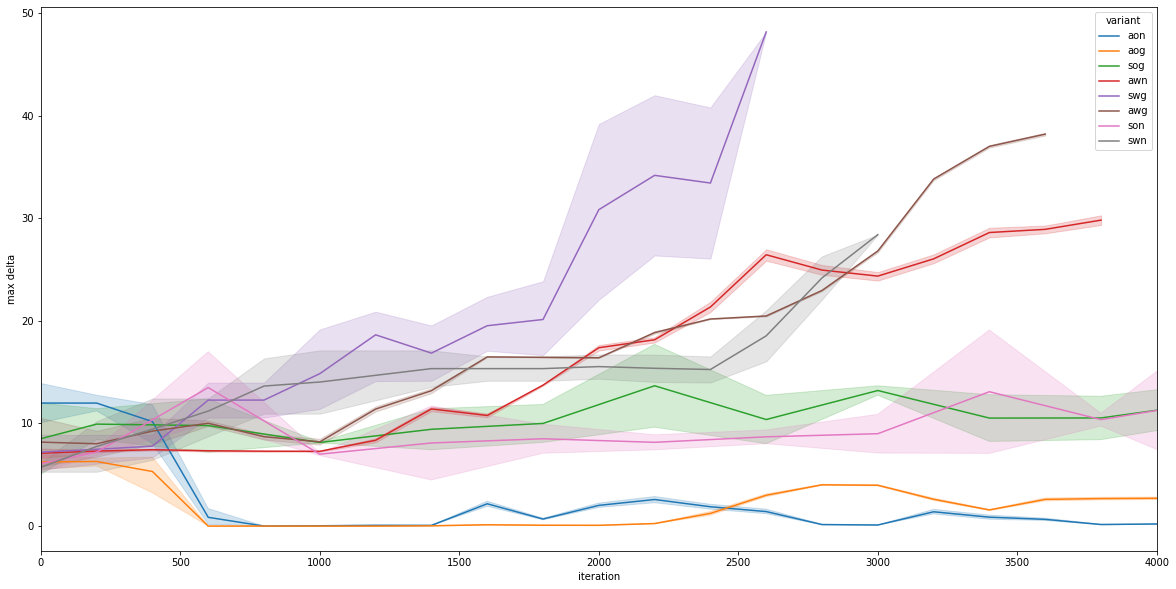

In [20]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=ld_data,x="iteration",y="max delta",hue="variant")
ax.set_xlim([0,4000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

(0.0, 4000.0)

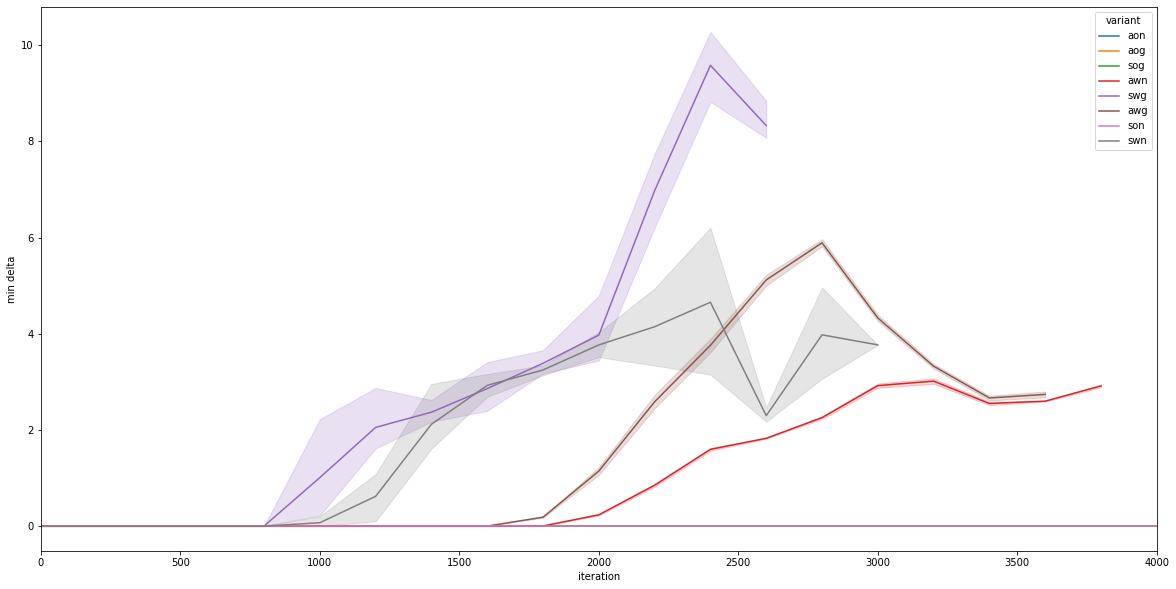

In [23]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=ld_data,x="iteration",y="min delta",hue="variant")
ax.set_xlim([0,4000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

(0.0, 4000.0)

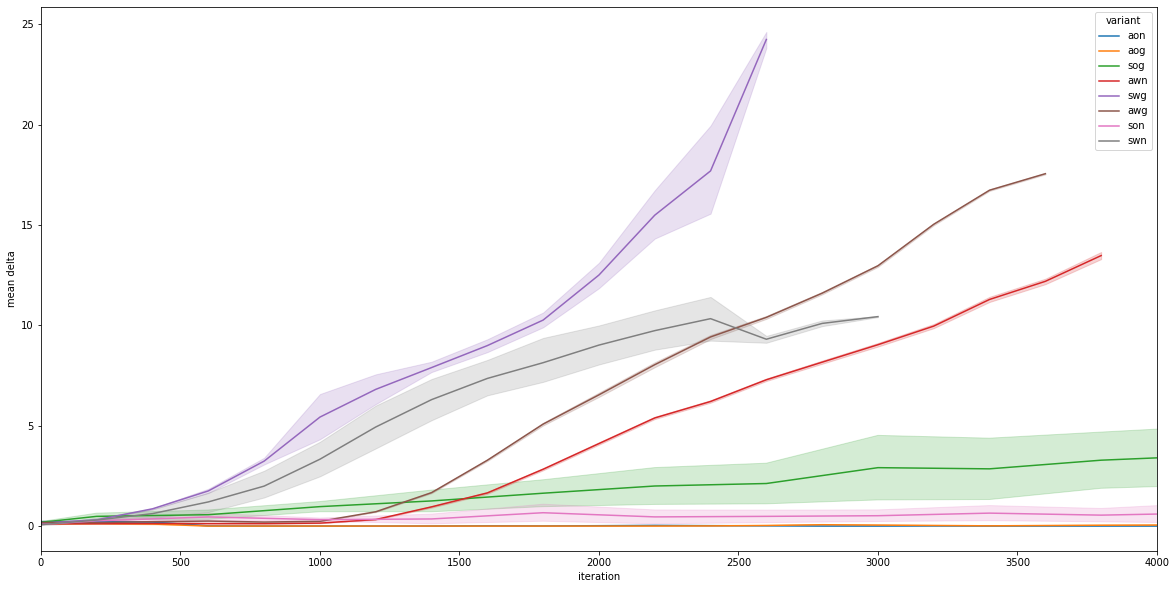

In [24]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=ld_data,x="iteration",y="mean delta",hue="variant")
ax.set_xlim([0,4000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='variant', ylabel='max delta'>

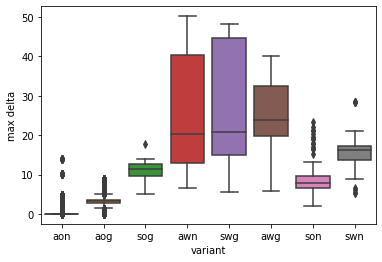

In [21]:
sns.boxplot(data=ld_data,x="variant",y="max delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

(0.0, 4000.0)

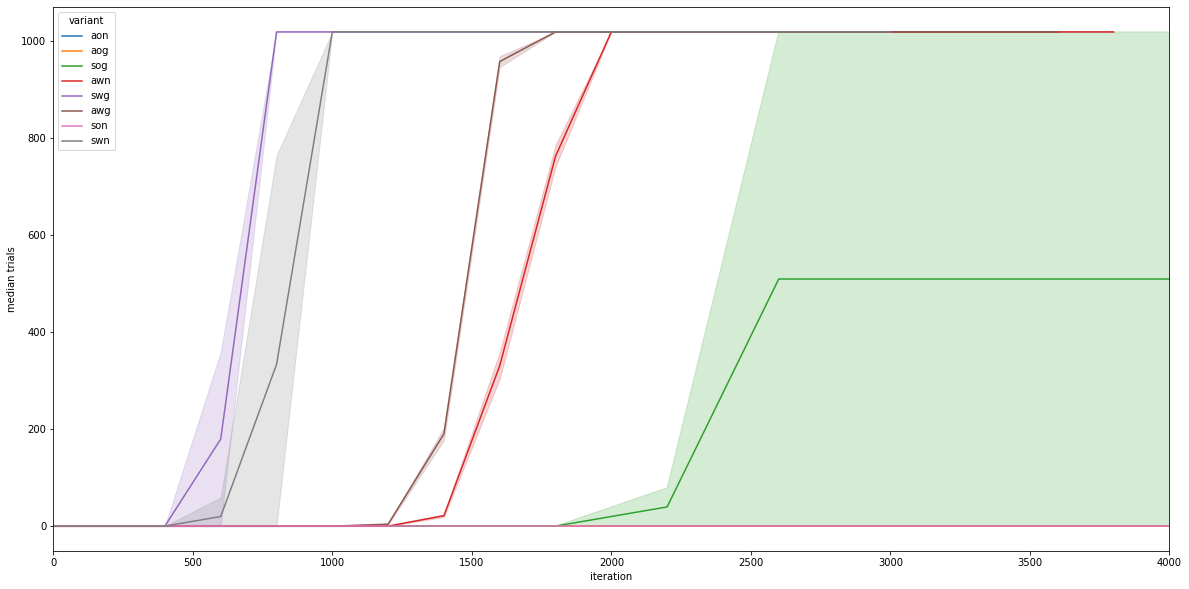

In [22]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=ld_data,x="iteration",y="median trials",hue="variant")
ax.set_xlim([0,4000])


# No Learning

(0.0, 15000.0)

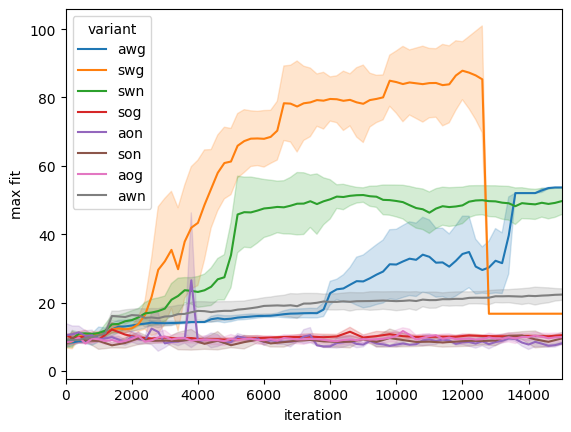

In [42]:
ax = sns.lineplot(data=fit_data,x="iteration",y="max fit",hue="variant",errorbar="sd")
ax.set_xlim([0,15000])

(0.0, 15000.0)

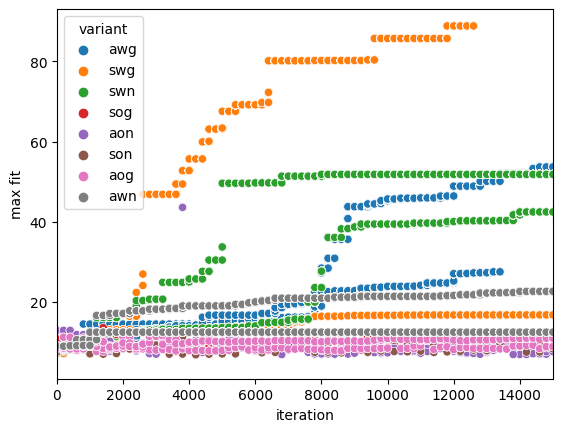

In [43]:
ax = sns.scatterplot(data=fit_data,x="iteration",y="max fit",hue="variant")
ax.set_xlim([0,15000])

(0.0, 15000.0)

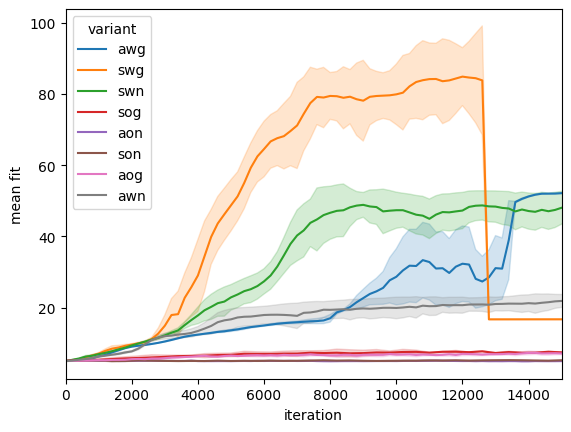

In [45]:
ax = sns.lineplot(data=fit_data,x="iteration",y="mean fit",hue="variant",errorbar="sd")
ax.set_xlim([0,15000])

(0.0, 15000.0)

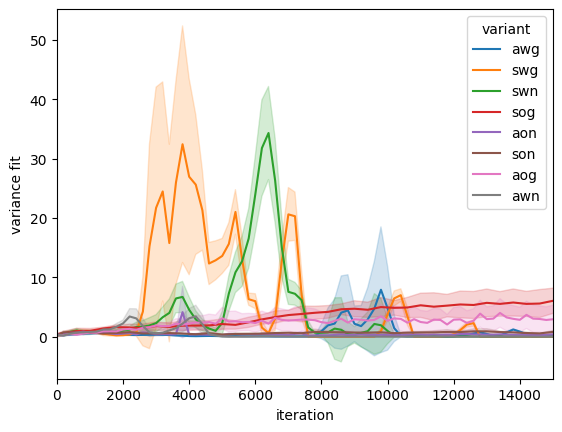

In [47]:
ax = sns.lineplot(data=fit_data,x="iteration",y="variance fit",hue="variant",errorbar="sd")
ax.set_xlim([0,15000])

<Axes: xlabel='variant', ylabel='max fit'>

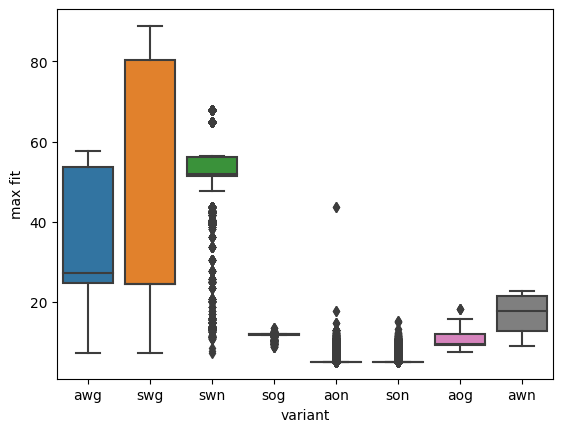

In [44]:
sns.boxplot(data=fit_data,x="variant",y="max fit")

# Synch vs Async, learning vs learning with target delta

In [3]:
data_lines = []
for folder in os.listdir("/home/leni/m2w_logs/m2w_3/"):
    foldername = "/home/leni/m2w_logs/m2w_3/" + folder
    names = folder.split("_")
    synch = ""
    target = ""
    if names[0] == "swg":
        synch = "synchronous"
    elif names[0] == "awg":
        synch = "asynchronous"
    if len(names) == 3:
        target = names[2]
    else:
        target = "no target"
    for replicate in os.listdir(foldername):
        fit_lines = load_fitnesses_agg(foldername + "/" + replicate)
        data_lines += [[synch,target,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["synchronicity","target delta","replicate","time","computation time","discretized time","Number of robots","number of robots","number of new individual","mean fit","median fit","std fit","max fit","min fit"])


In [96]:
print(fit_data)

       synchronicity  target delta                               replicate  \
0        synchronous  target delta    m2w_2023_10_2_14_29_54_114183_788377   
1        synchronous  target delta    m2w_2023_10_2_14_29_54_114183_788377   
2        synchronous  target delta    m2w_2023_10_2_14_29_54_114183_788377   
3        synchronous  target delta    m2w_2023_10_2_14_29_54_114183_788377   
4        synchronous  target delta    m2w_2023_10_2_14_29_54_114183_788377   
...              ...           ...                                     ...   
101483  asynchronous     no target  m2w_2023_10_2_14_29_35_423379_15715915   
101484  asynchronous     no target  m2w_2023_10_2_14_29_35_423379_15715915   
101485  asynchronous     no target  m2w_2023_10_2_14_29_35_423379_15715915   
101486  asynchronous     no target  m2w_2023_10_2_14_29_35_423379_15715915   
101487  asynchronous     no target  m2w_2023_10_2_14_29_35_423379_15715915   

               time  computation time  discretized time  Number

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

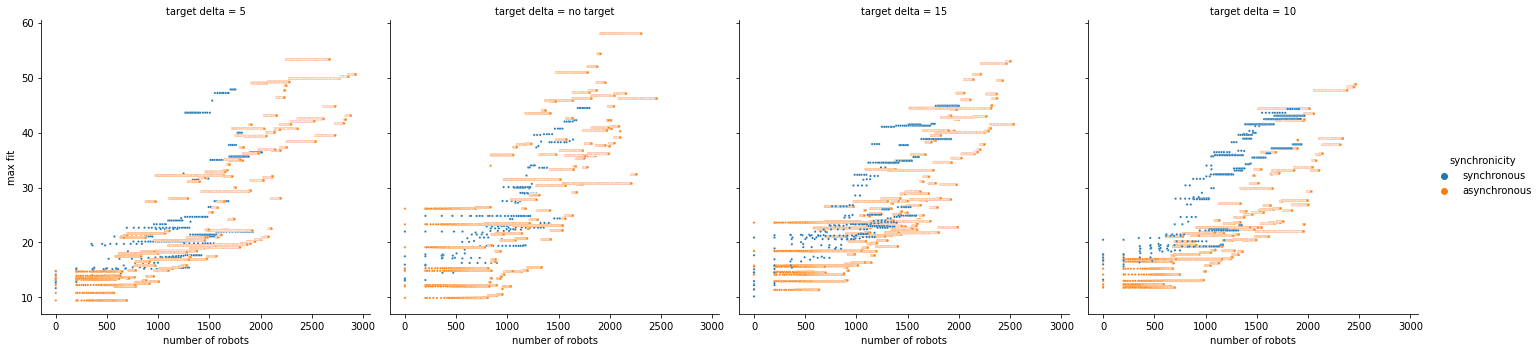

In [4]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="scatter",s=5,x="number of robots",y="max fit",hue="synchronicity",col="target delta")
#ax.set_xlim([0,4000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

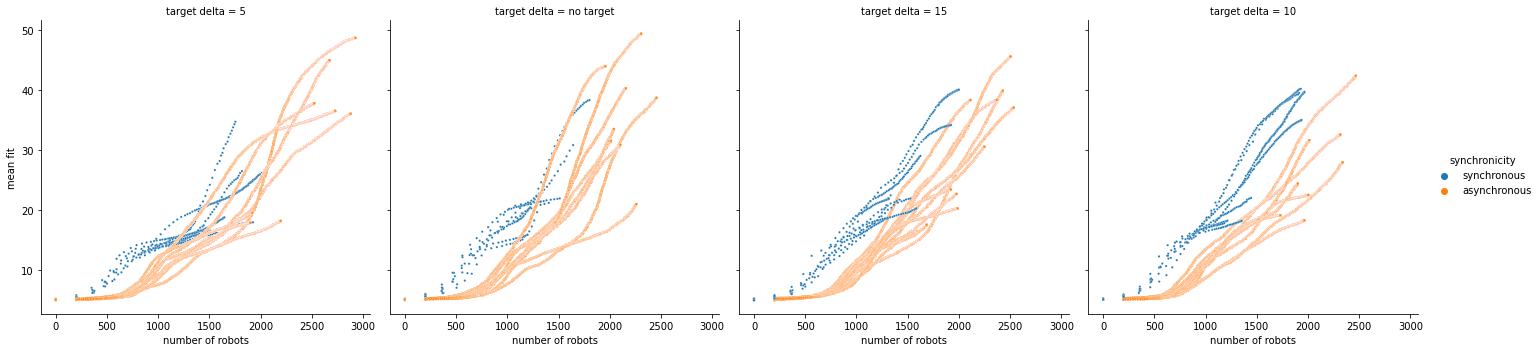

In [5]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="scatter",s=5,x="number of robots",y="mean fit",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

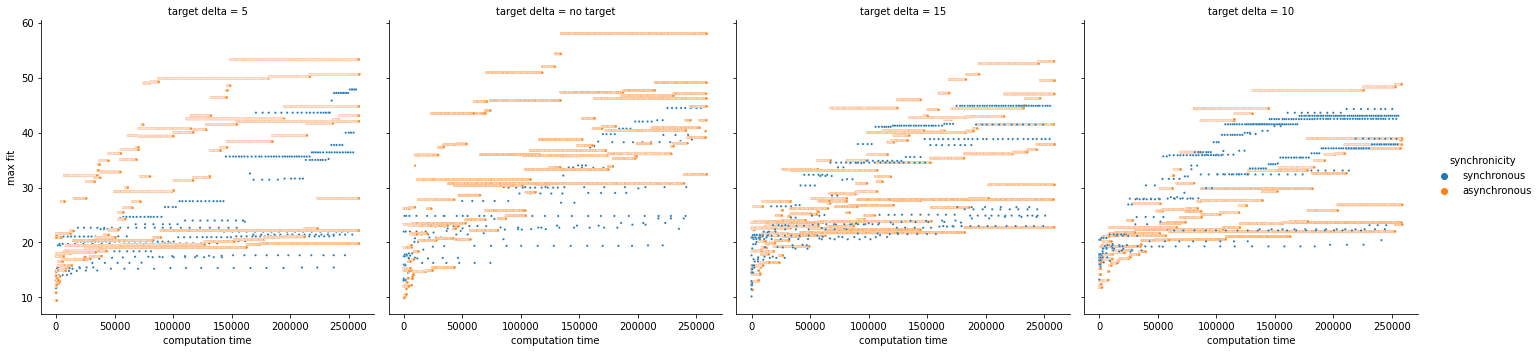

In [6]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="scatter",s=5,x="computation time",y="max fit",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

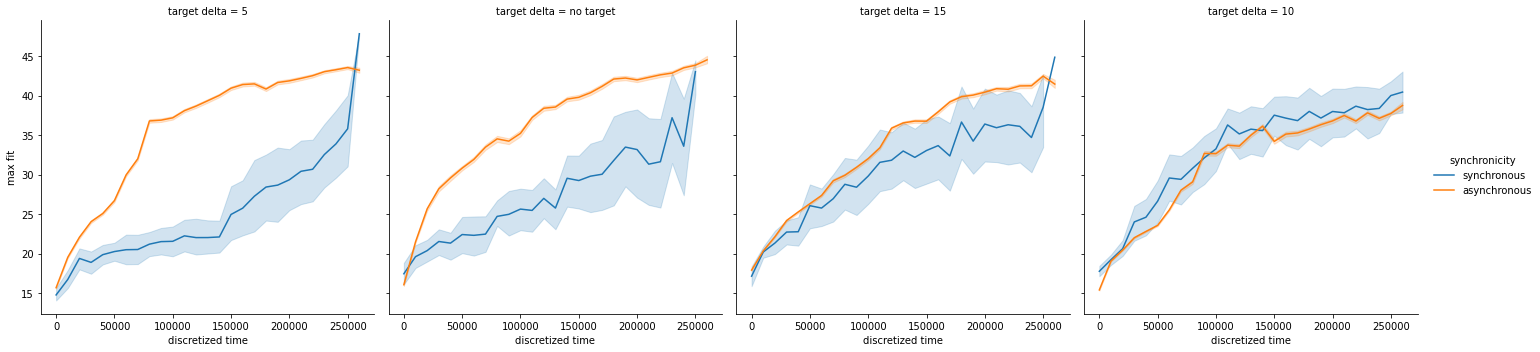

In [7]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="line",x="discretized time",y="max fit",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

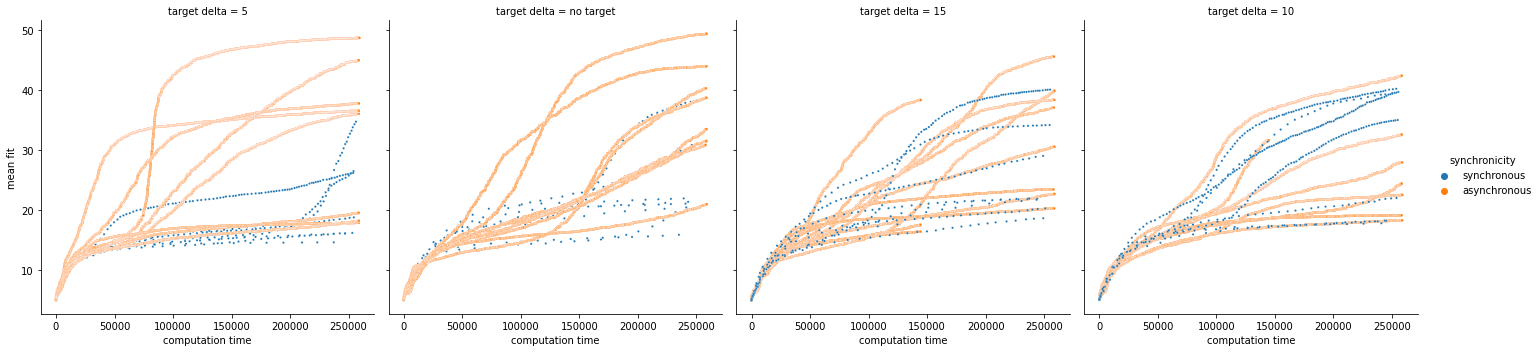

In [8]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="scatter",s=5,x="computation time",y="mean fit",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

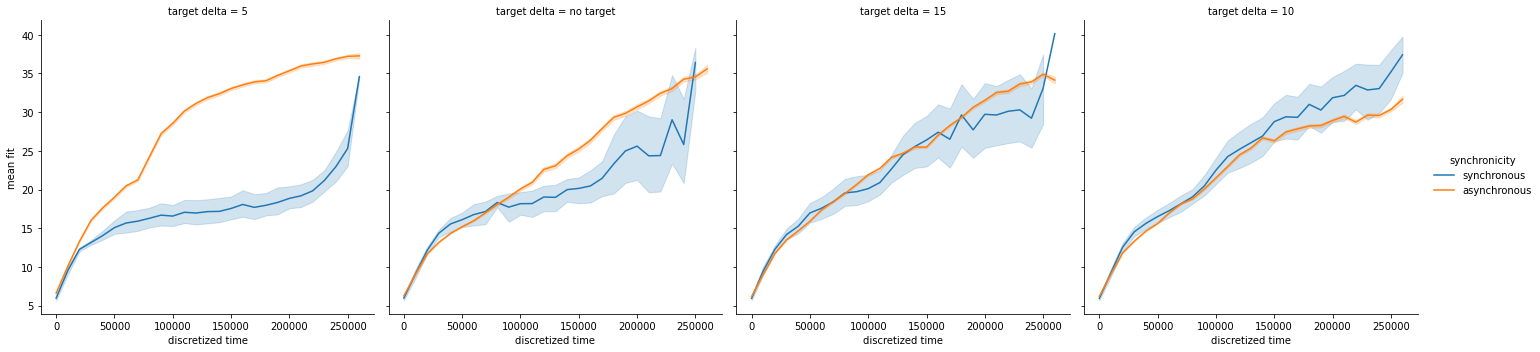

In [9]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="line",x="discretized time",y="mean fit",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

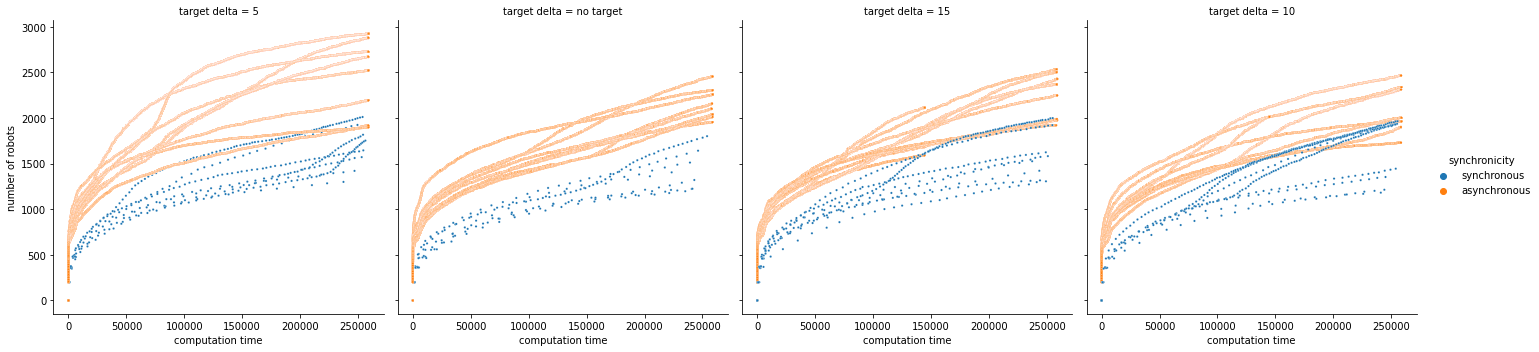

In [10]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="scatter",x="computation time",y="number of robots",s=5,hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

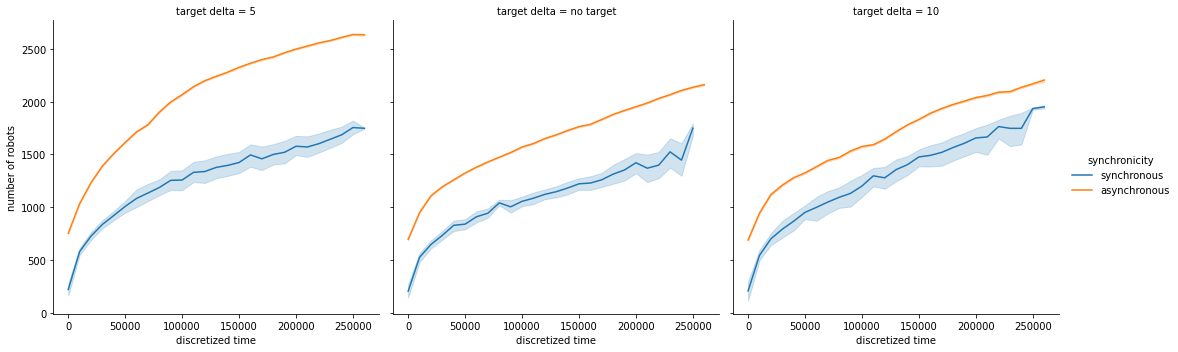

In [27]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="line",x="discretized time",y="number of robots",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

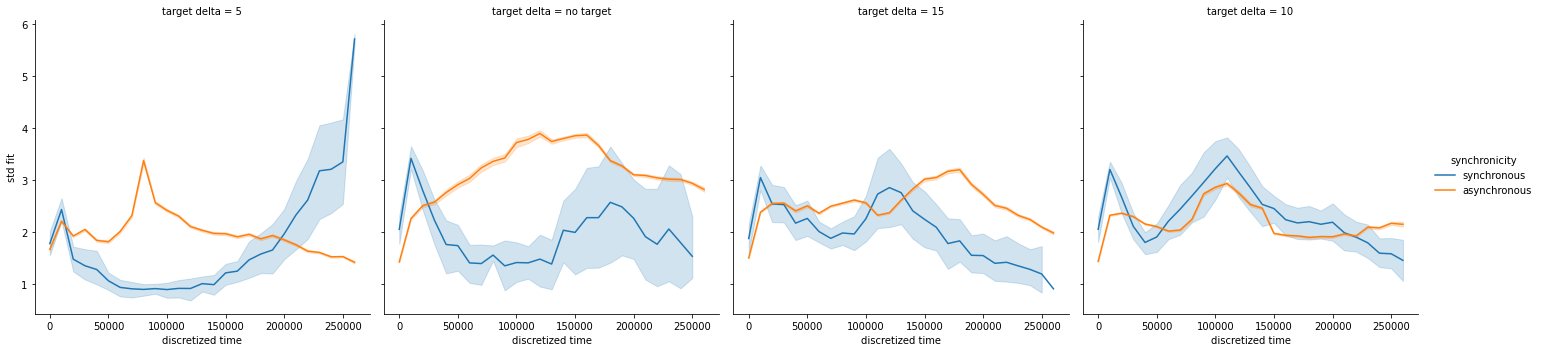

In [18]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="line",x="discretized time",y="std fit",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='Number of robots', ylabel='time'>

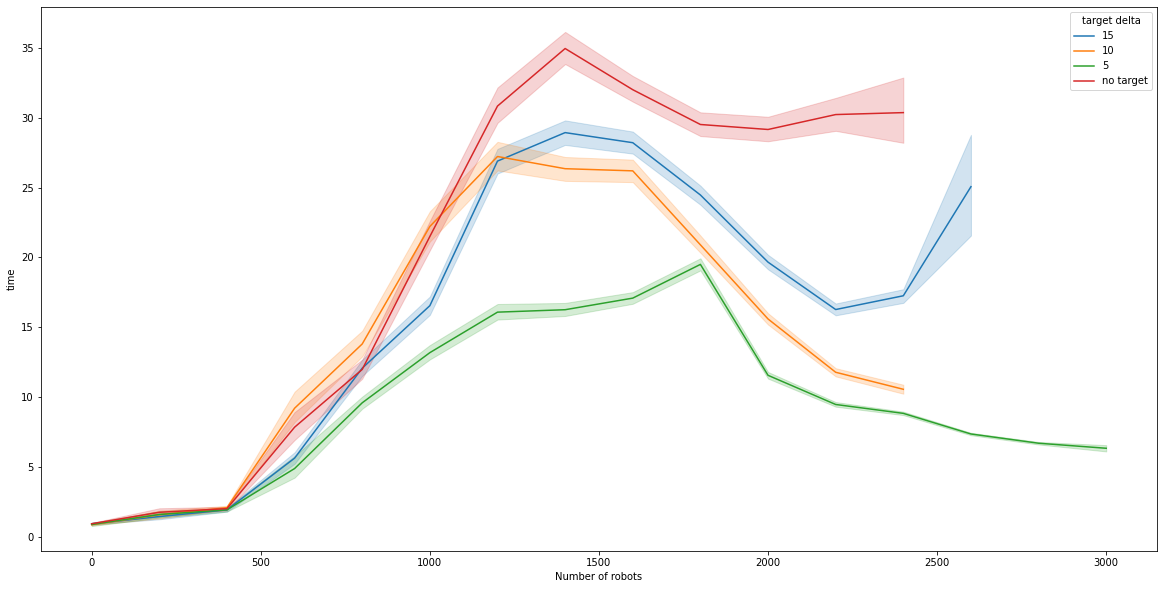

In [11]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="Number of robots",y="time",hue="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='discretized time', ylabel='time'>

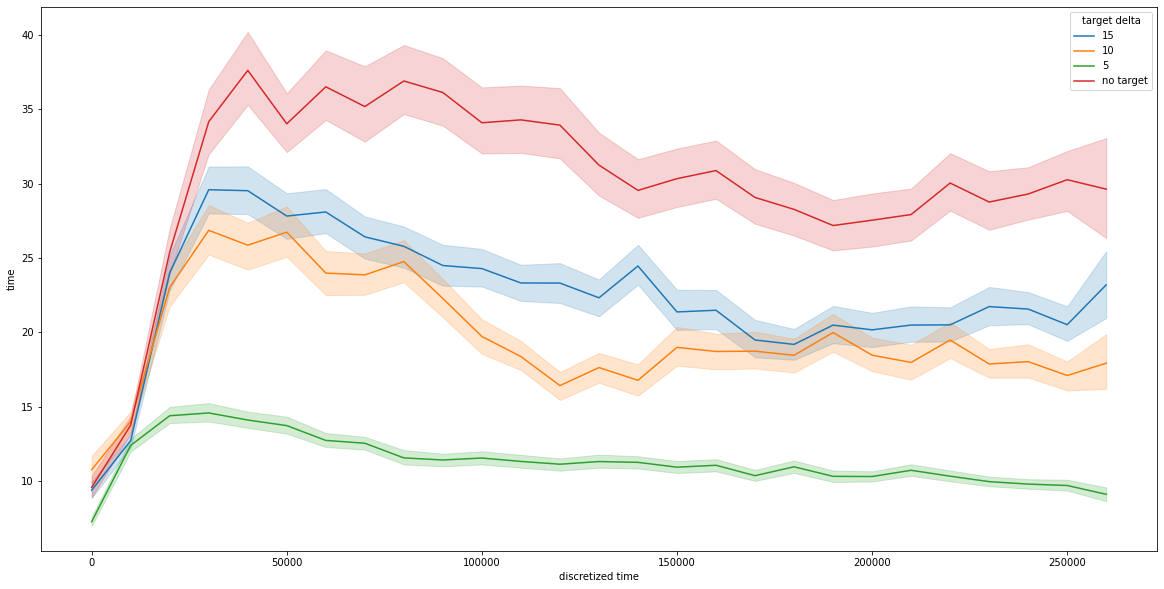

In [12]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="time",hue="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='discretized time', ylabel='max fit'>

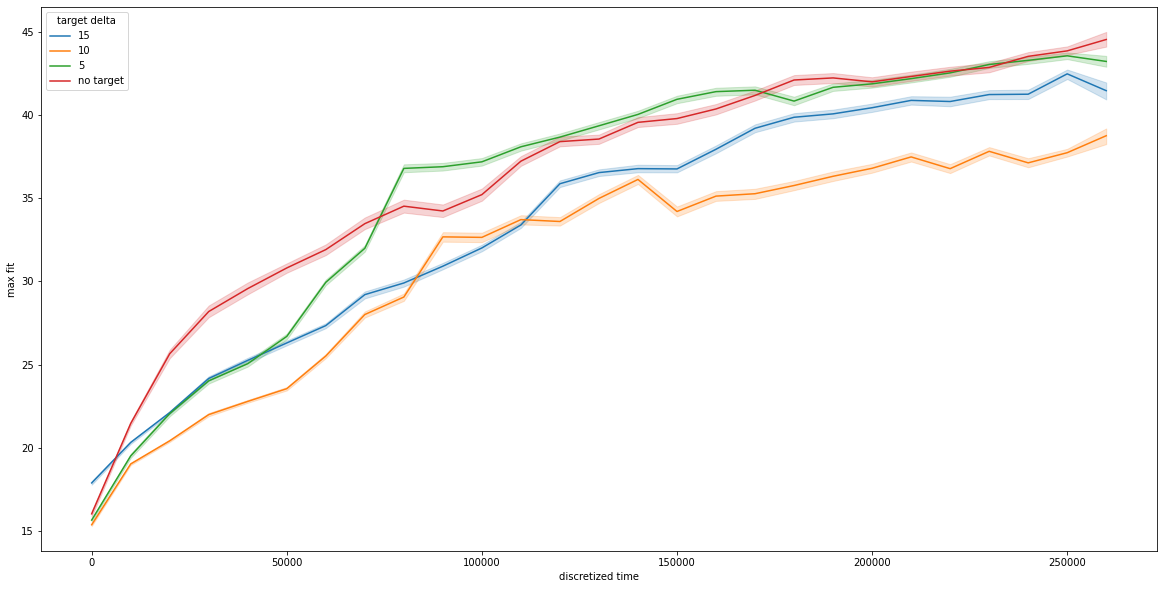

In [13]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="max fit",hue="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='discretized time', ylabel='mean fit'>

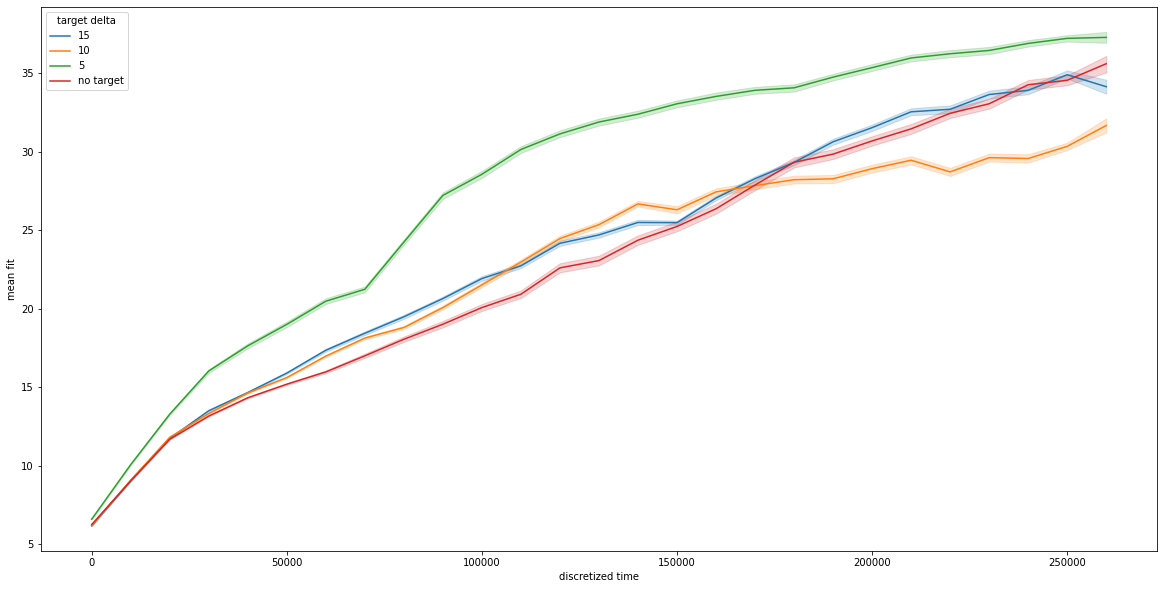

In [14]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="mean fit",hue="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='discretized time', ylabel='number of robots'>

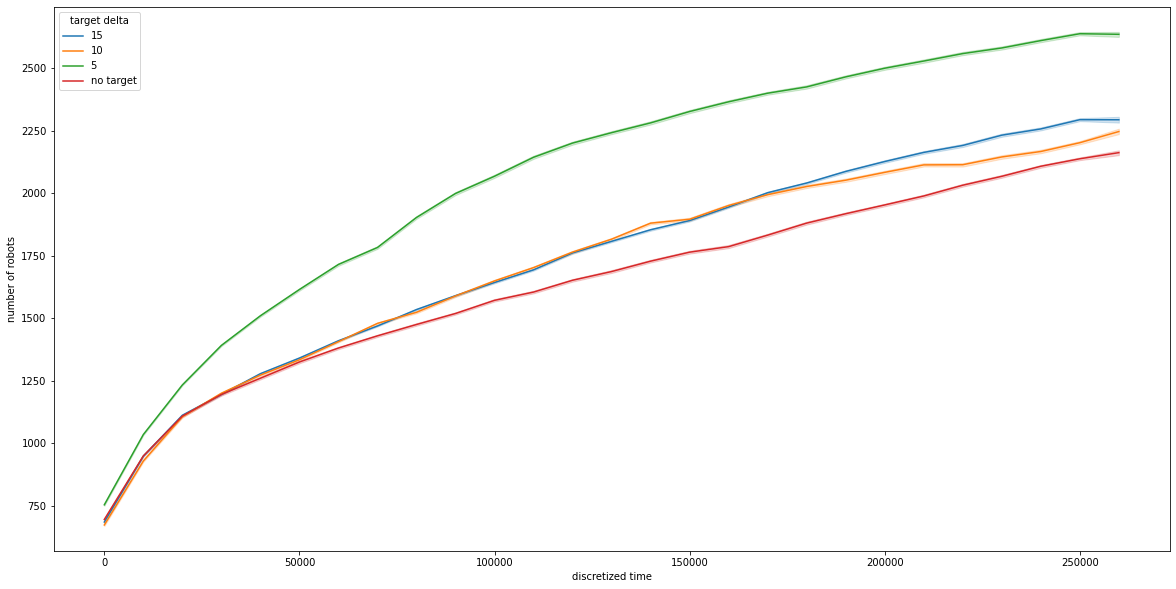

In [15]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="number of robots",hue="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='discretized time', ylabel='max fit'>

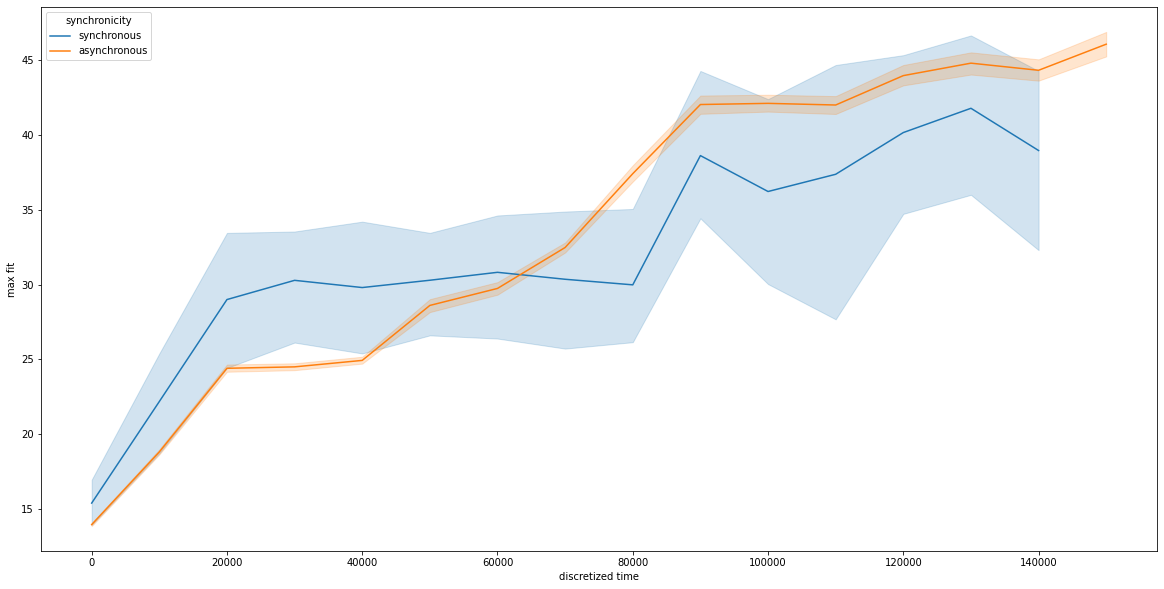

In [137]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=fit_data.loc[fit_data["target delta"]=="no target"],x="discretized time",y="max fit",hue="synchronicity")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

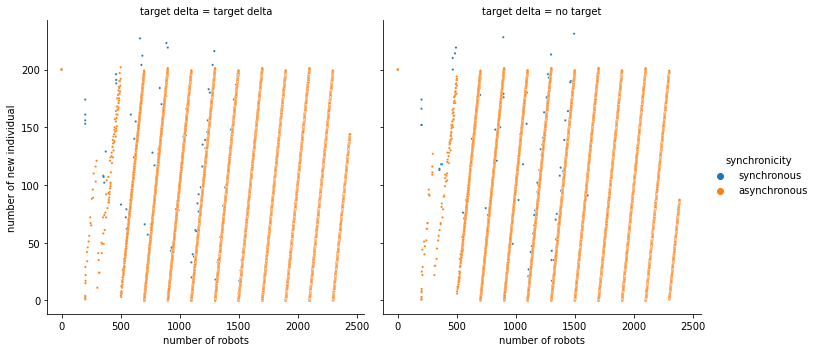

In [98]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="scatter",s=5,x="number of robots",y="number of new individual",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

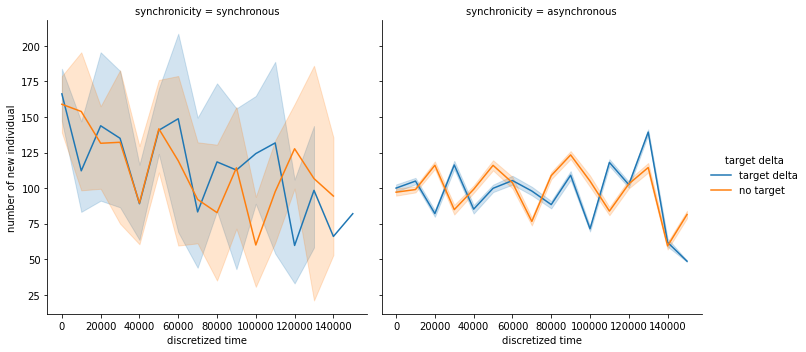

In [141]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=fit_data,kind="line",x="discretized time",y="number of new individual",hue="target delta",col="synchronicity")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='target delta', ylabel='max fit'>

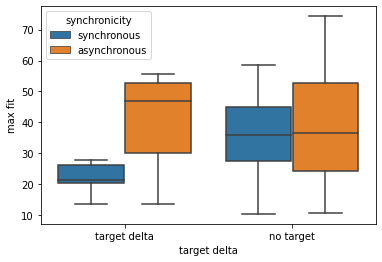

In [49]:
sns.boxplot(data=fit_data,x="target delta",y="max fit",hue="synchronicity")

In [35]:
data_lines = []
for folder in os.listdir("/home/leni/m2w_logs/m2w_3/"):
    foldername = "/home/leni/m2w_logs/m2w_3/" + folder
    names = folder.split("_")
    synch = ""
    target = ""
    if names[0] == "swg":
        synch = "synchronous"
    elif names[0] == "awg":
        synch = "asynchronous"
    if len(names) == 3:
        target = names[2]
    else:
        target = "no target"
    for replicate in os.listdir(foldername):
        fit_lines = load_learning_data_agg(foldername + "/" + replicate)
        data_lines += [[synch,target,replicate]+fit for fit in fit_lines]
ld_data = pd.DataFrame(data=data_lines,columns=["synchronicity","target delta","replicate","time","computation time","discretized time","Number of robots","number of robots", \
                "mean delta","median delta","variance delta","max delta","min delta", \
                "mean trials","median trials","variance trials","max trials","min trials",])

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

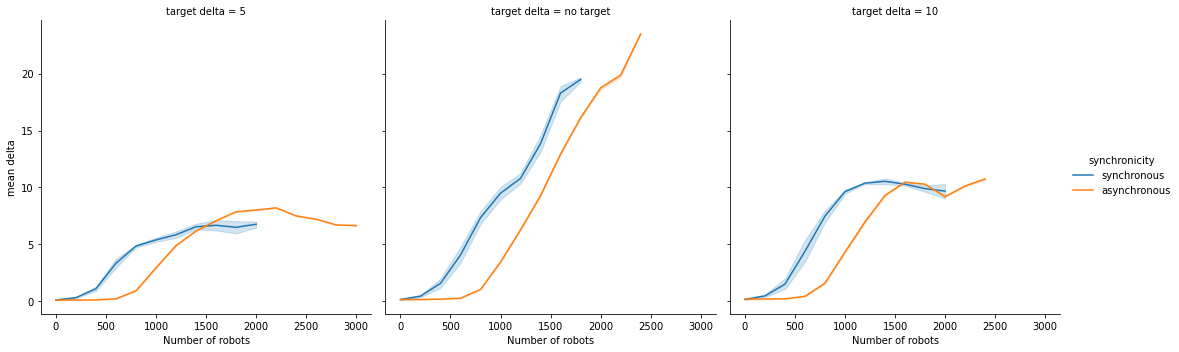

In [36]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=ld_data,kind="line",x="Number of robots",y="mean delta",hue="synchronicity",col="target delta")


/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

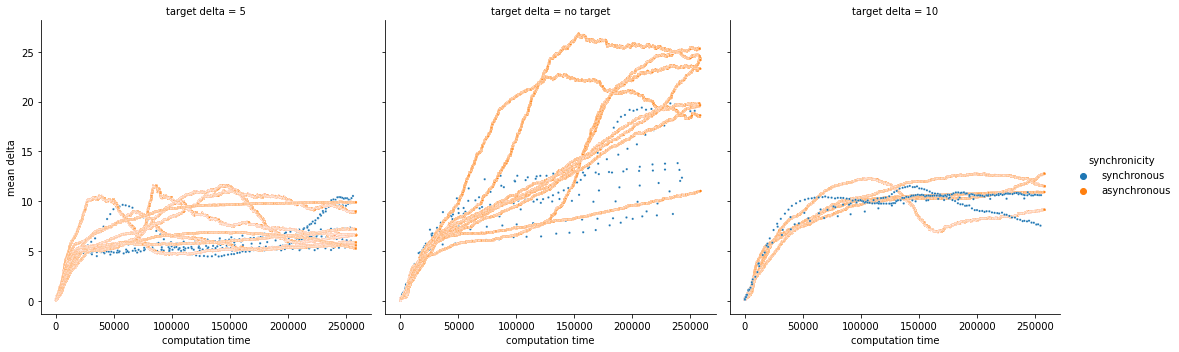

In [37]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=ld_data,kind="scatter",s=5,x="computation time",y="mean delta",hue="synchronicity",col="target delta")


/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

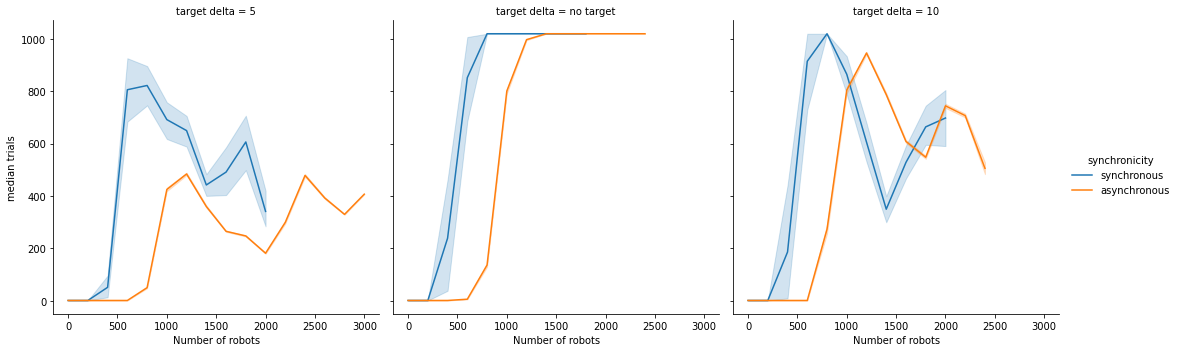

In [38]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=ld_data,kind="line",x="Number of robots",y="median trials",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

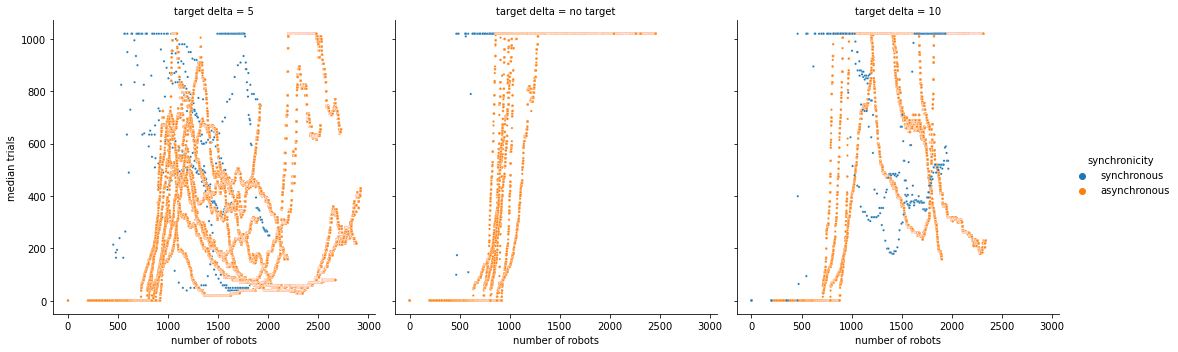

In [39]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=ld_data,kind="scatter",s=5,x="number of robots",y="median trials",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

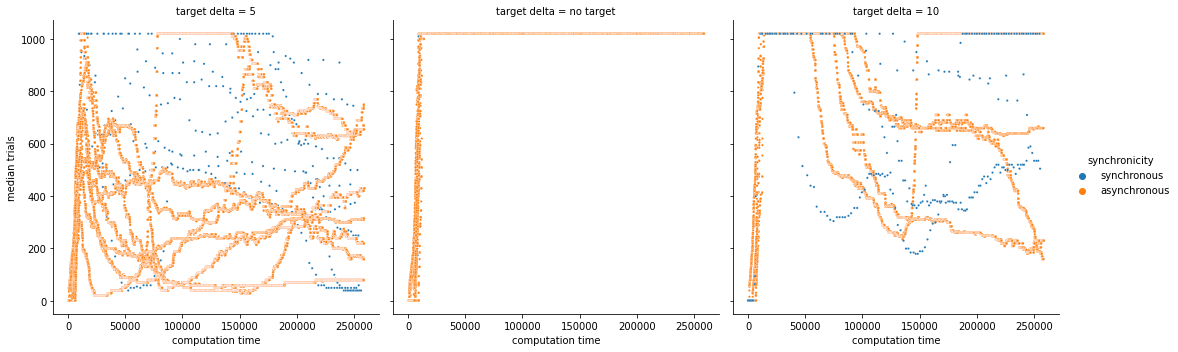

In [40]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=ld_data,kind="scatter",s=5,x="computation time",y="median trials",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

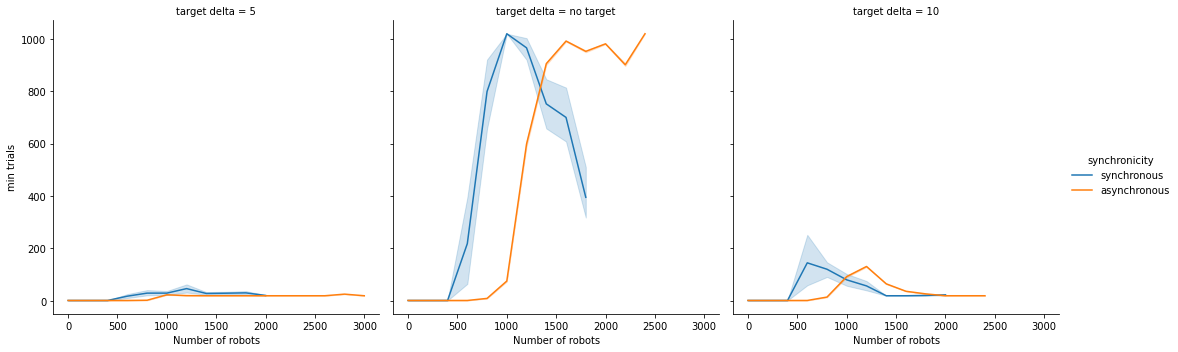

In [41]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=ld_data,kind="line",x="Number of robots",y="min trials",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

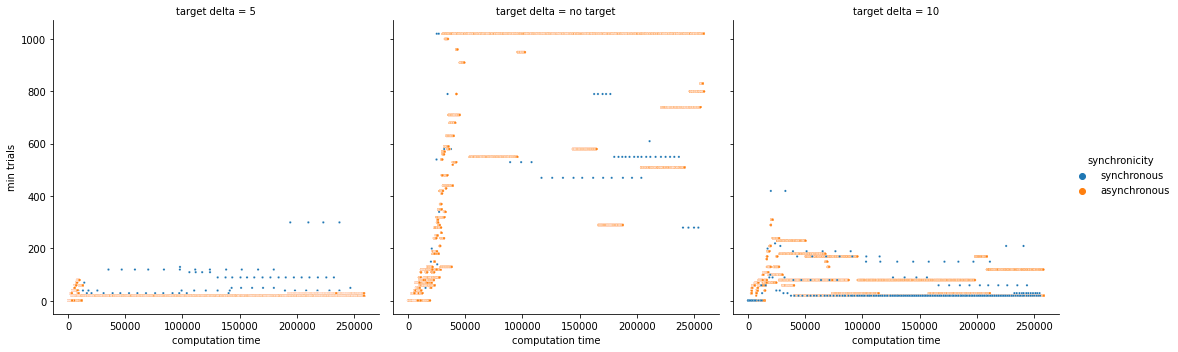

In [42]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=ld_data,kind="scatter",s=5,x="computation time",y="min trials",hue="synchronicity",col="target delta")

In [43]:
data_lines = []
for folder in os.listdir("/home/leni/m2w_logs/m2w_3/"):
    foldername = "/home/leni/m2w_logs/m2w_3/" + folder
    names = folder.split("_")
    synch = ""
    target = ""
    if names[0] == "swg":
        synch = "synchronous"
    elif names[0] == "awg":
        synch = "asynchronous"
    if len(names) == 3:
        target = names[2]
    else:
        target = "no target"
    for replicate in os.listdir(foldername):
        fit_lines = load_morph_norms_agg(foldername + "/" + replicate)
        data_lines += [[synch,target,replicate]+fit for fit in fit_lines]
mn_data = pd.DataFrame(data=data_lines,columns=["synchronicity","target delta","replicate","time","computation time","discretized time","Number of robots","number of new individual","mean morph norms","median morph norms","variance morph norms","max morph norms","min morph norms"])

In [44]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=mn_data,kind="scatter",s=5,x="number of robots",y="variance morph norms",hue="synchronicity",col="target delta")

ValueError: Could not interpret value `number of robots` for parameter `x`

<Figure size 1440x720 with 0 Axes>

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

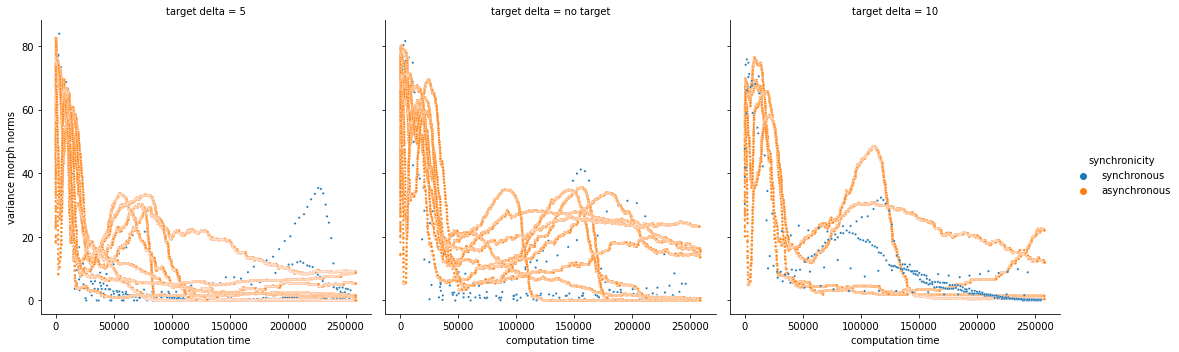

In [45]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=mn_data,kind="scatter",s=5,x="computation time",y="variance morph norms",hue="synchronicity",col="target delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

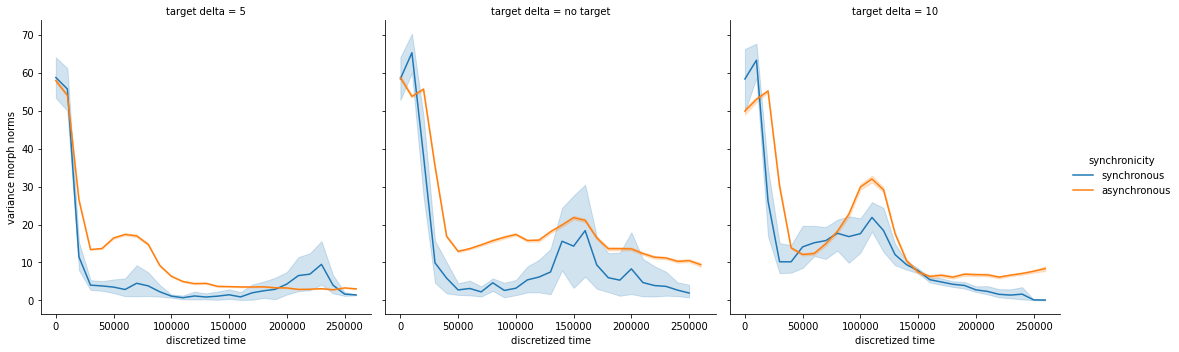

In [46]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.relplot(data=mn_data,kind="line",x="discretized time",y="variance morph norms",hue="synchronicity",col="target delta")